In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("kolkata_Data_2000-2020.csv")


In [2]:
data.head()


,Date,Humidity,Evaporation,Rainfall,Temperature,Precipitation,Wind Speed
0,01-01-2000,36.720016,0.000008,0.0,296.462402,0.0,8.027043
1,02-01-2000,43.786797,0.000015,0.0,295.999207,0.0,8.385116
2,03-01-2000,44.161610,0.000014,0.0,295.573242,0.0,8.796876
3,04-01-2000,38.276482,0.000014,0.0,295.761536,0.0,8.647821
4,05-01-2000,43.167194,0.000013,0.0,294.066773,0.0,7.185318


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7671 entries, 0 to 7670
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7671 non-null   object 
 1   Humidity       7671 non-null   float64
 2   Evaporation    7671 non-null   float64
 3   Rainfall       7671 non-null   float64
 4   Temperature    7671 non-null   float64
 5   Precipitation  7671 non-null   float64
 6   Wind Speed     7671 non-null   float64
dtypes: float64(6), object(1)
memory usage: 419.6+ KB


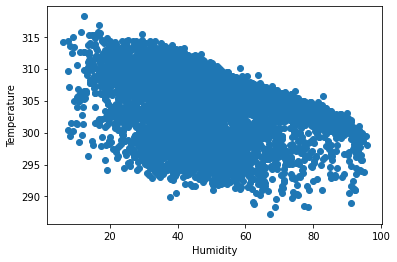

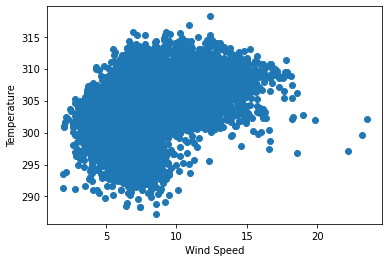

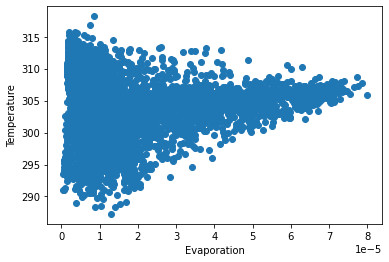

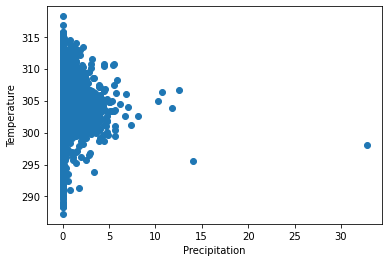

In [4]:
plt.scatter(data['Humidity'], data['Temperature'])
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()
plt.scatter(data['Wind Speed'], data['Temperature'])
plt.xlabel('Wind Speed')
plt.ylabel('Temperature')
plt.show()
plt.scatter(data['Evaporation'], data['Temperature'])
plt.xlabel('Evaporation')
plt.ylabel('Temperature')
plt.show()
plt.scatter(data['Precipitation'], data['Temperature'])
plt.xlabel('Precipitation')
plt.ylabel('Temperature')
plt.show()

In [5]:
Target=data['Temperature']
data=data.drop(labels=['Date','Temperature'],axis=1)


In [6]:
Target

0       296.462402
1       295.999207
2       295.573242
3       295.761536
4       294.066773
           ...    
7666    297.019379
7667    295.728729
7668    297.028809
7669    296.585266
7670    296.474609
Name: Temperature, Length: 7671, dtype: float64

In [7]:
data

,Humidity,Evaporation,Rainfall,Precipitation,Wind Speed
0,36.720016,0.000008,0.0,0.0,8.027043
1,43.786797,0.000015,0.0,0.0,8.385116
2,44.161610,0.000014,0.0,0.0,8.796876
3,38.276482,0.000014,0.0,0.0,8.647821
4,43.167194,0.000013,0.0,0.0,7.185318
...,...,...,...,...,...
7666,35.141602,0.000011,0.0,0.0,9.074366
7667,42.497074,0.000010,0.0,0.0,7.608373
7668,41.381065,0.000010,0.0,0.0,6.050164
7669,49.898449,0.000010,0.0,0.0,6.986880


In [8]:
#Train Test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(data,Target,test_size=0.3, random_state=0)

In [9]:
X_train

,Humidity,Evaporation,Rainfall,Precipitation,Wind Speed
6502,92.856277,0.000002,4.770000e-06,1.031250,13.897310
3956,51.635353,0.000020,7.630000e-06,0.000000,6.256212
5040,59.213413,0.000062,3.810000e-06,0.007812,3.352921
587,74.001381,0.000042,2.050000e-05,0.750000,10.665622
3553,67.628296,0.000048,2.860000e-06,0.187500,5.840091
...,...,...,...,...,...
4931,78.213867,0.000011,0.000000e+00,2.156250,8.996546
3264,50.180519,0.000010,0.000000e+00,0.000000,5.642597
1653,68.496544,0.000016,1.620000e-05,0.890625,7.513238
2607,33.058914,0.000018,0.000000e+00,0.000000,6.196634


In [10]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(X_train, y_train)
print(mutual_info)

[0.49307736 0.30174412 0.10764416 0.16139165 0.1686098 ]


In [11]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

Humidity         0.493077
Evaporation      0.301744
Wind Speed       0.168610
Precipitation    0.161392
Rainfall         0.107644
dtype: float64

In [12]:
type(mutual_info
    )

pandas.core.series.Series

In [13]:
plt.scatter(y_test, pred)
plt.show()

NameError: name 'pred' is not defined